### **Classification**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


### **EDA**

In [4]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

#### Remove Unnecessary columns 

In [6]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'CLIENTNUM'],axis=1,inplace=True,
)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


#### Visualize the target variable distribution

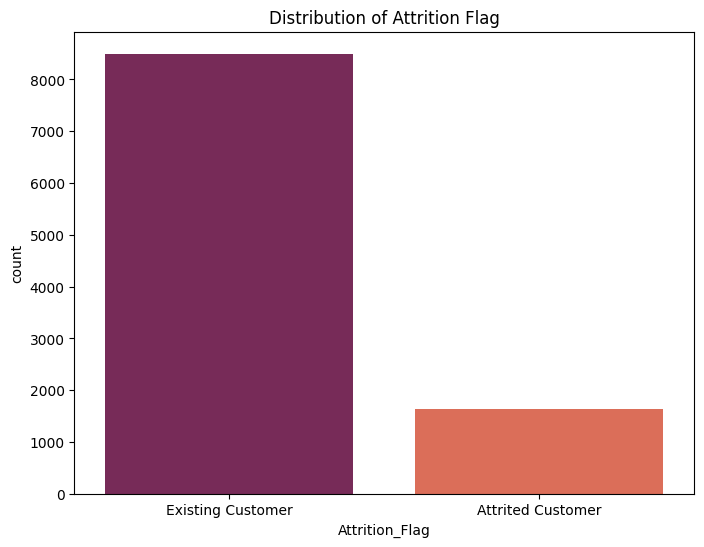

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition_Flag', data=df,palette='rocket',hue='Attrition_Flag')
plt.title('Distribution of Attrition Flag')
plt.show()

### Explore categorical features

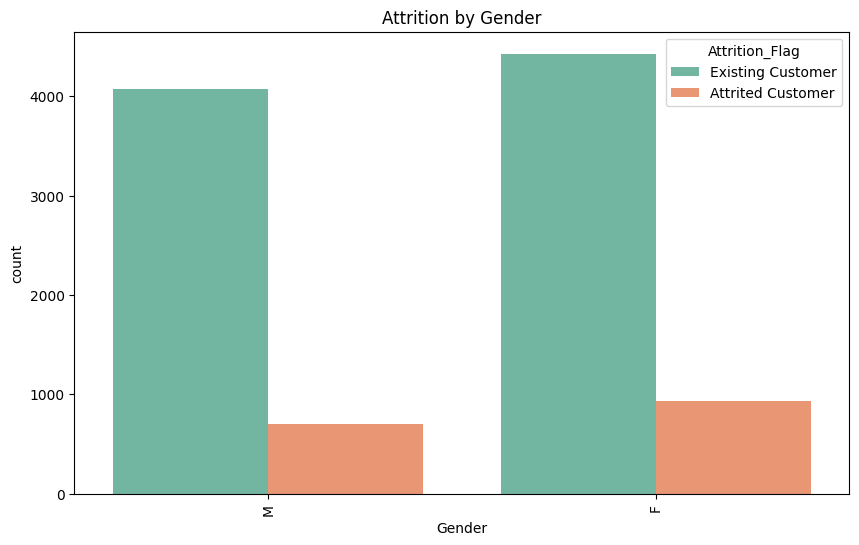

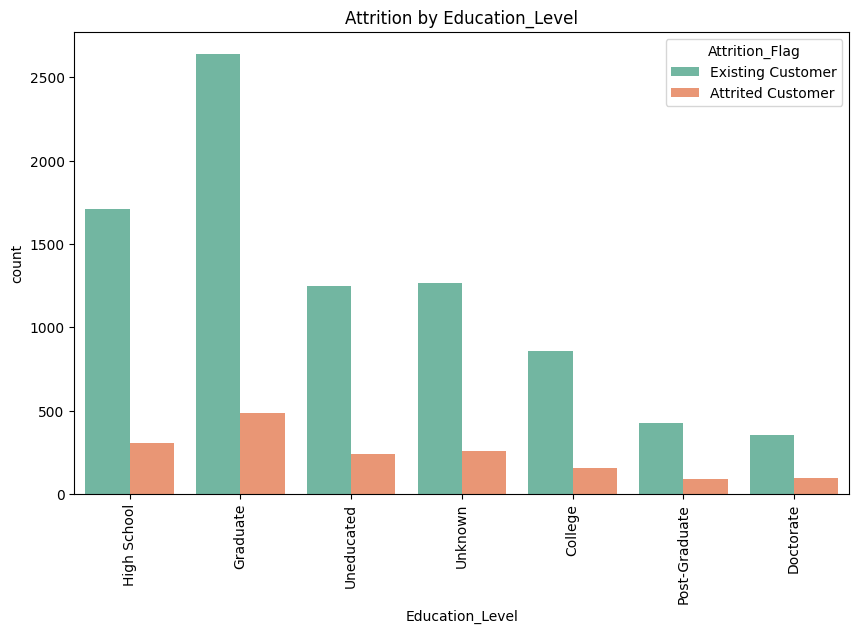

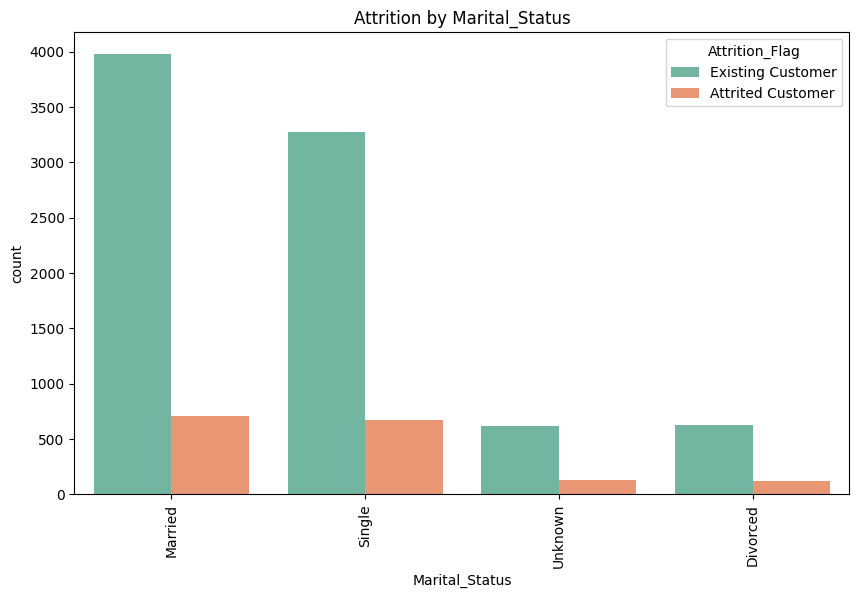

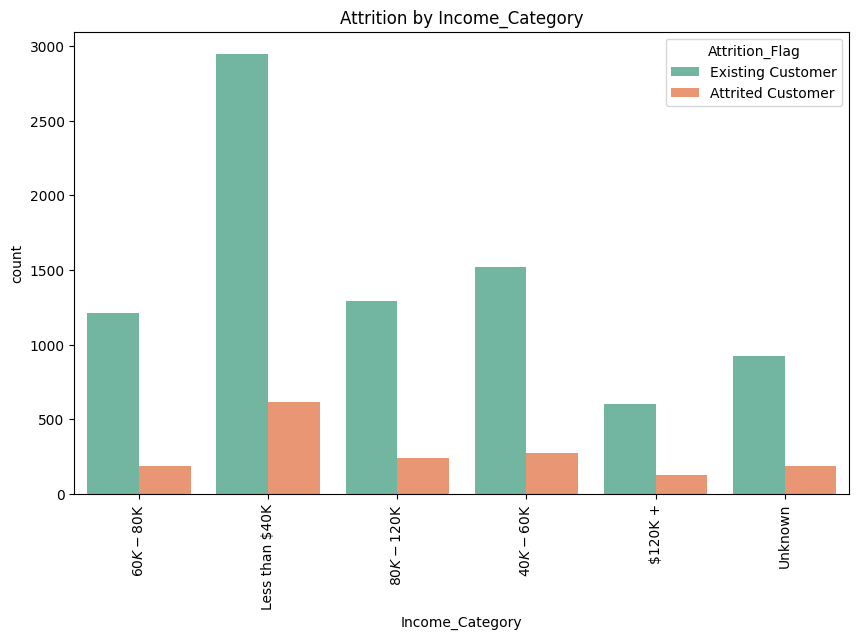

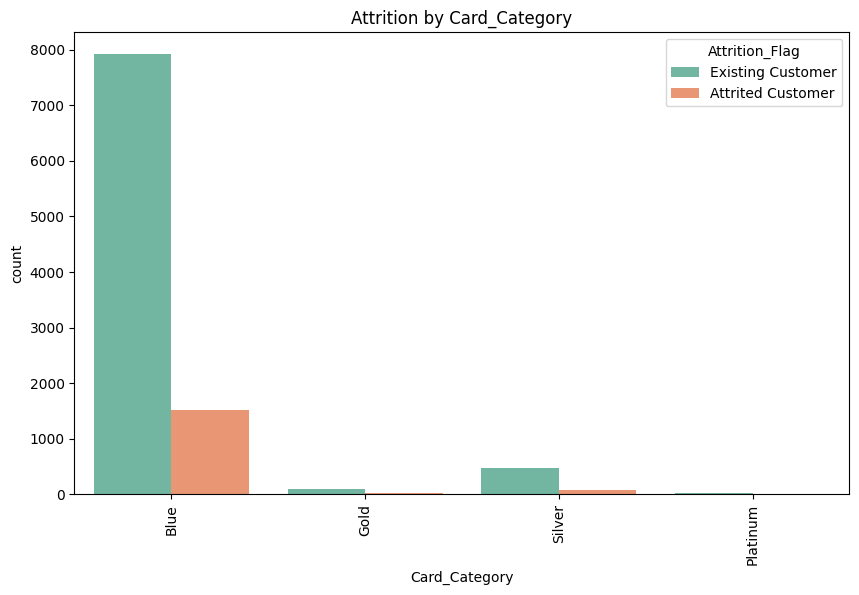

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attrition_Flag':
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, hue='Attrition_Flag', data=df,palette='Set2')
        plt.title(f'Attrition by {col}')
        plt.xticks(rotation=45)
        plt.xticks(rotation = 90)
        plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

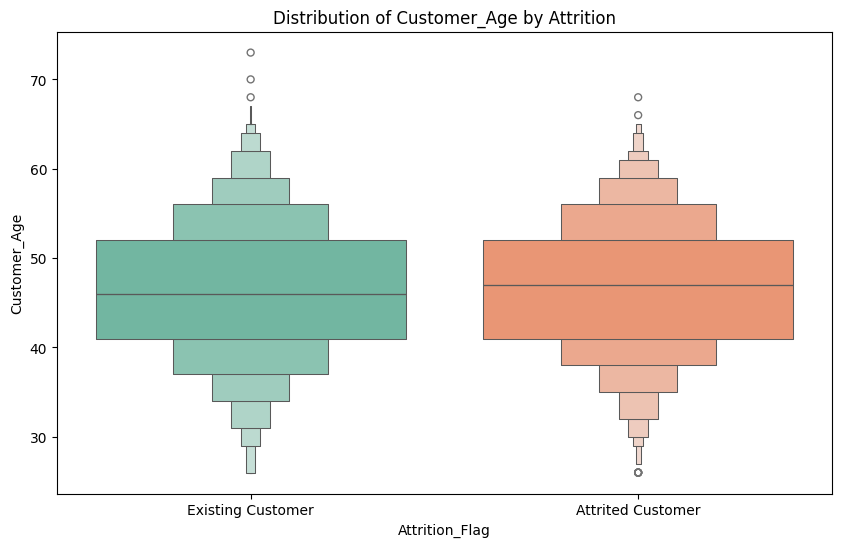

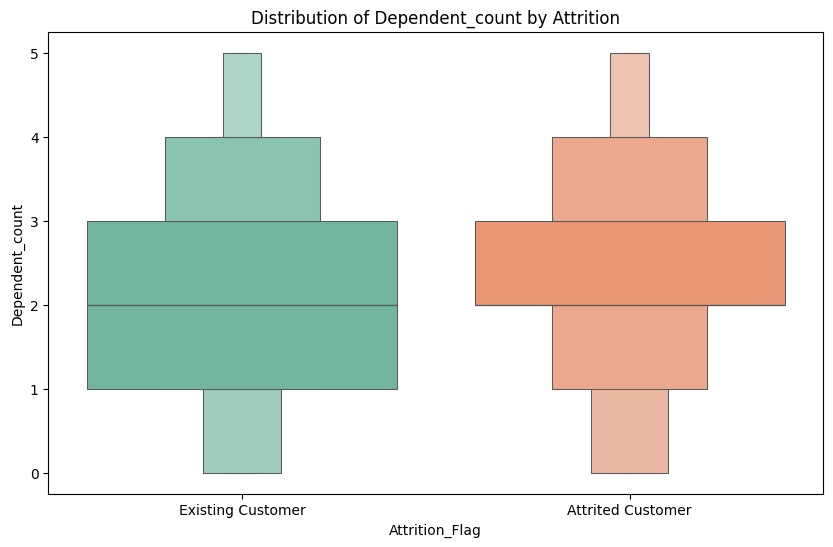

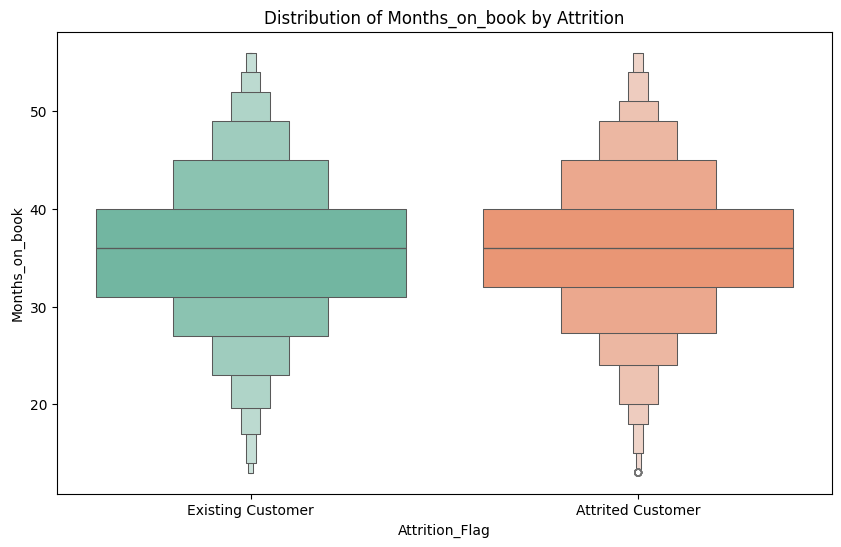

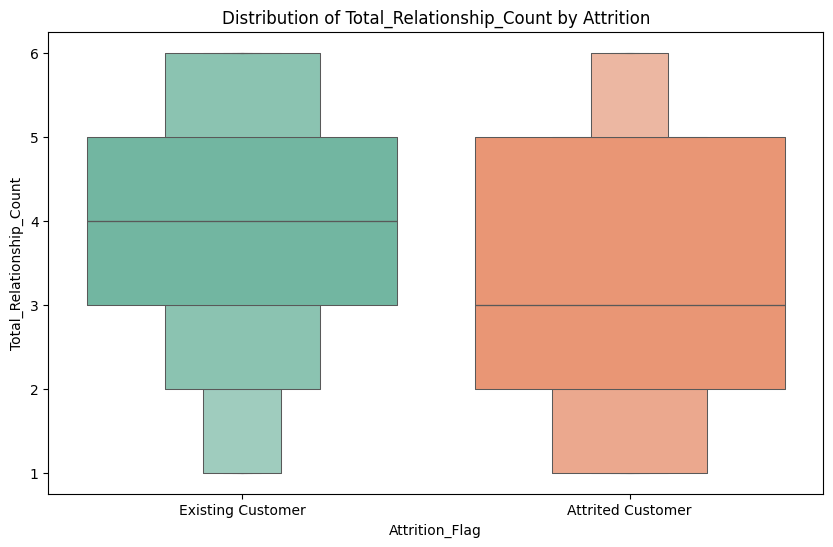

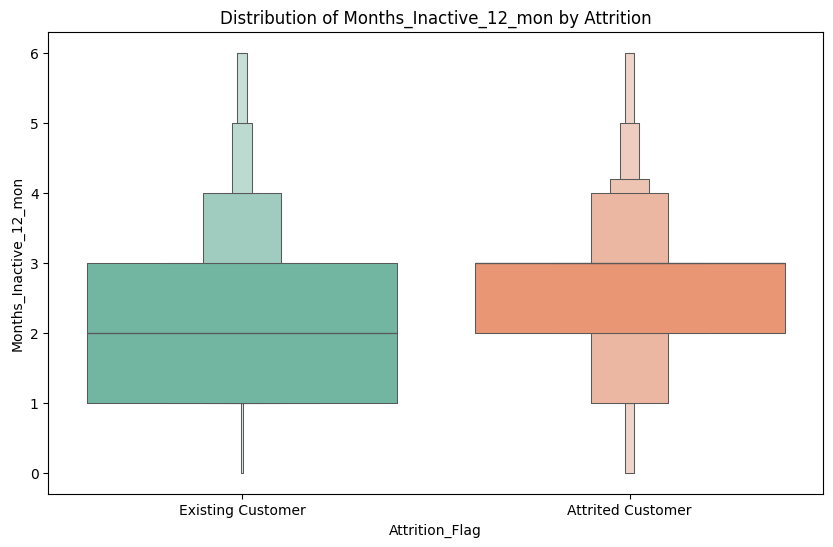

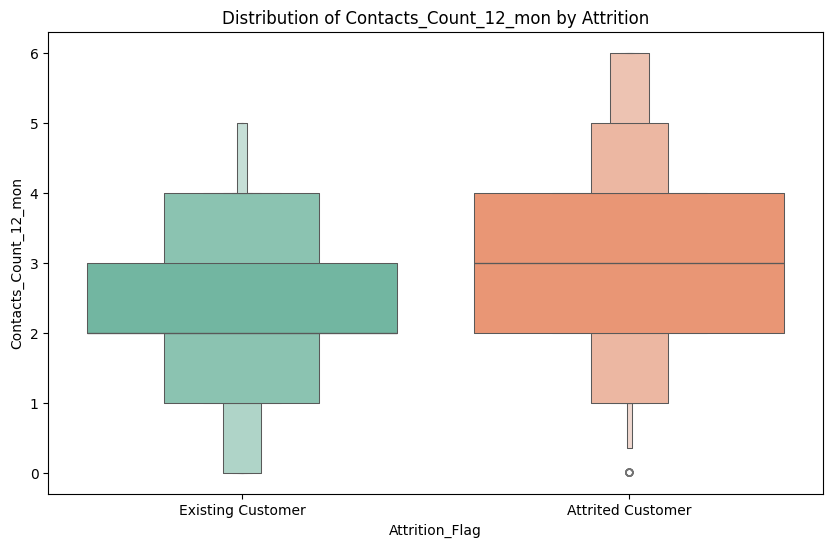

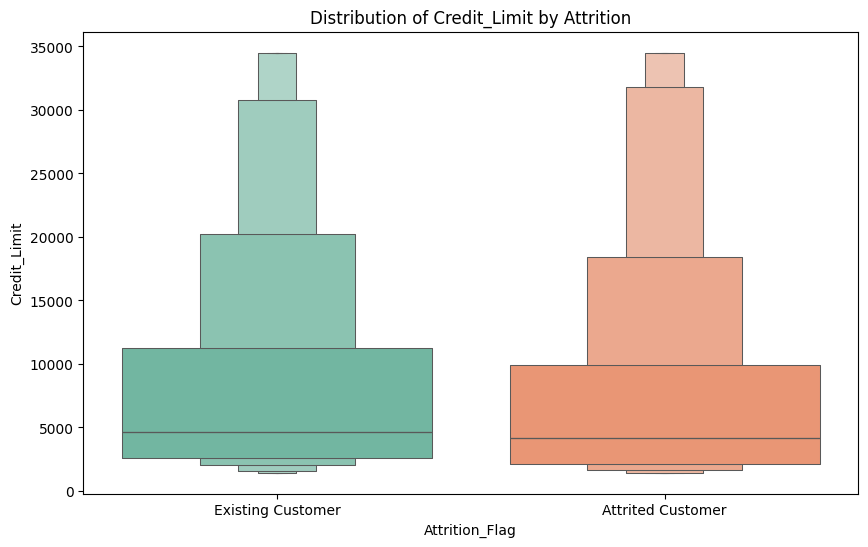

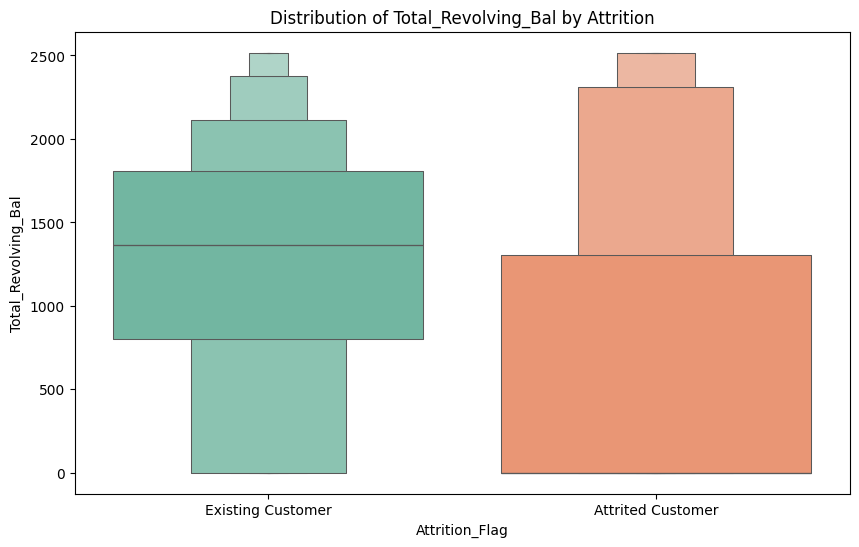

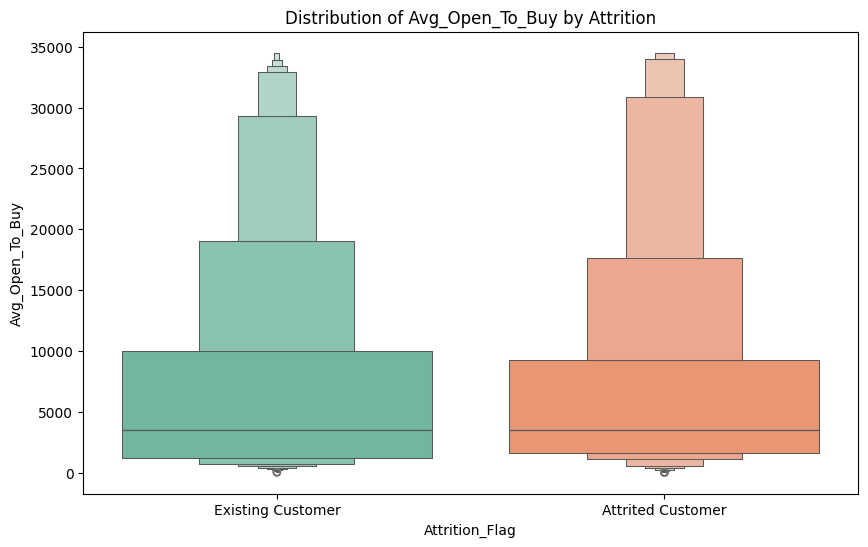

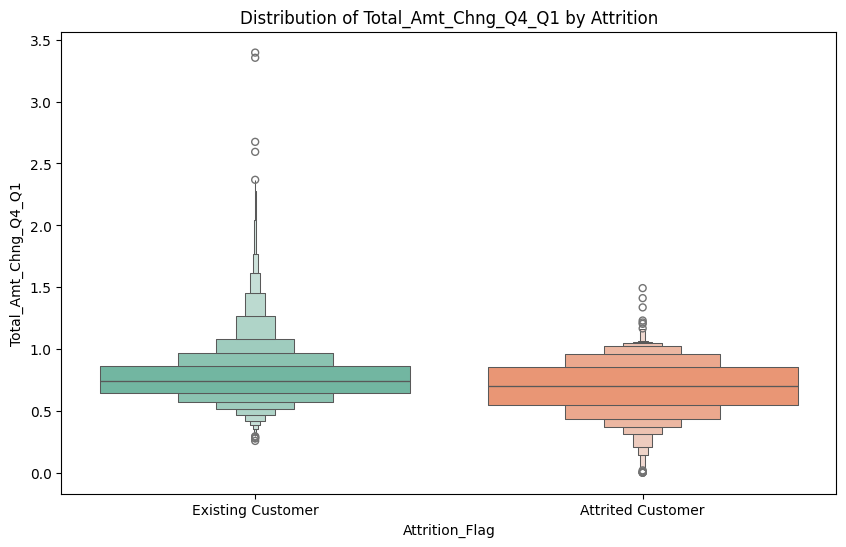

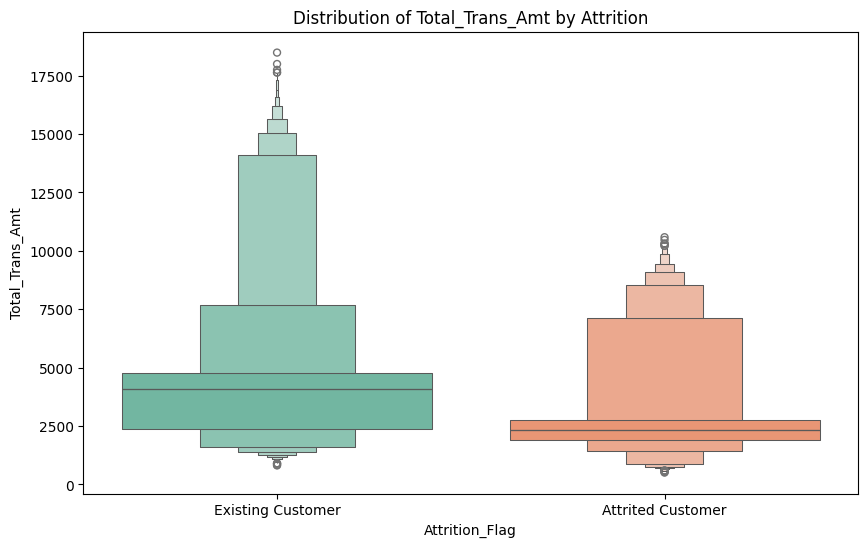

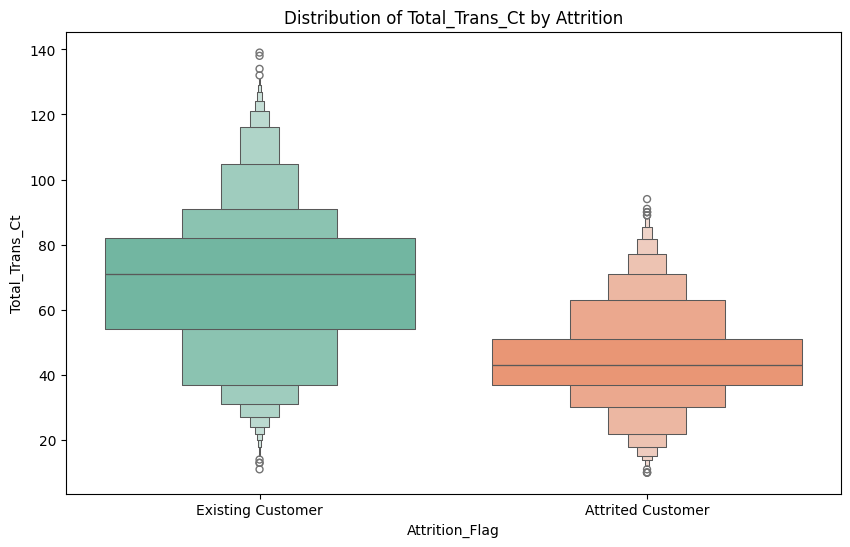

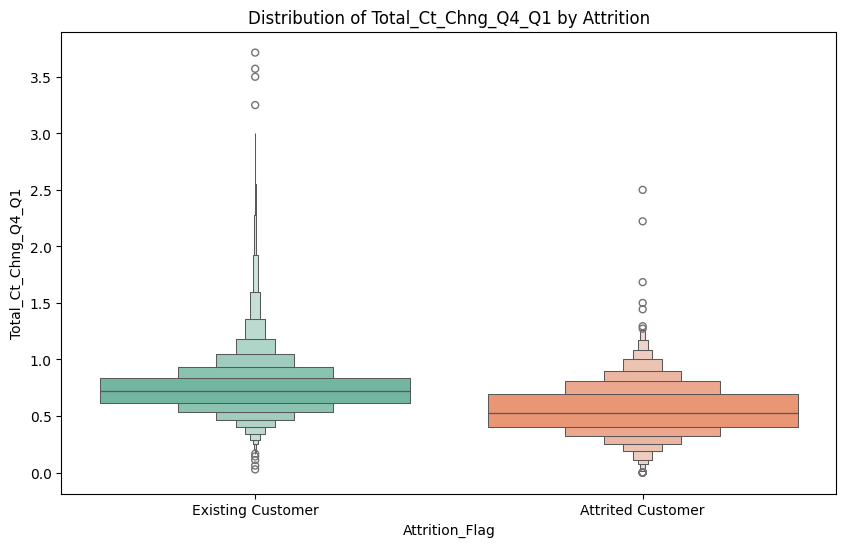

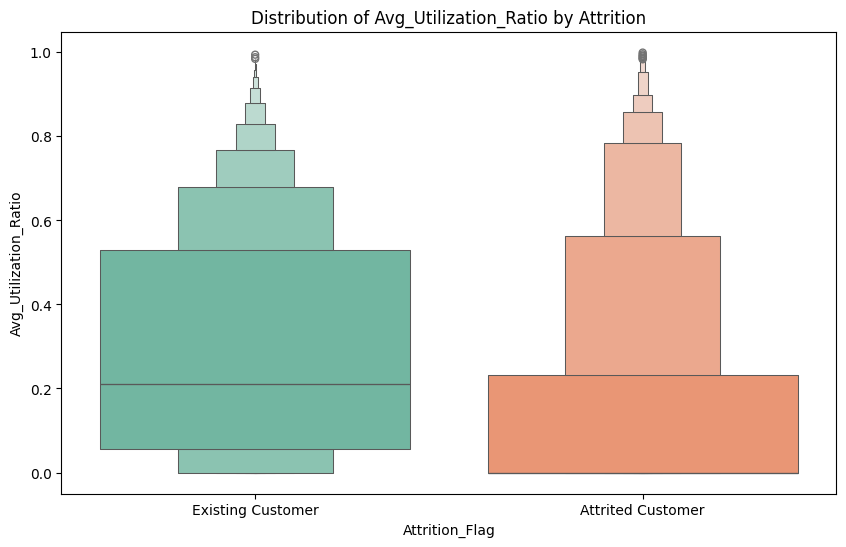

In [10]:
num_cols = df.select_dtypes(include=['int64','float64'])
for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.boxenplot(x='Attrition_Flag',y = col,data = df,hue='Attrition_Flag',palette='Set2')
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()


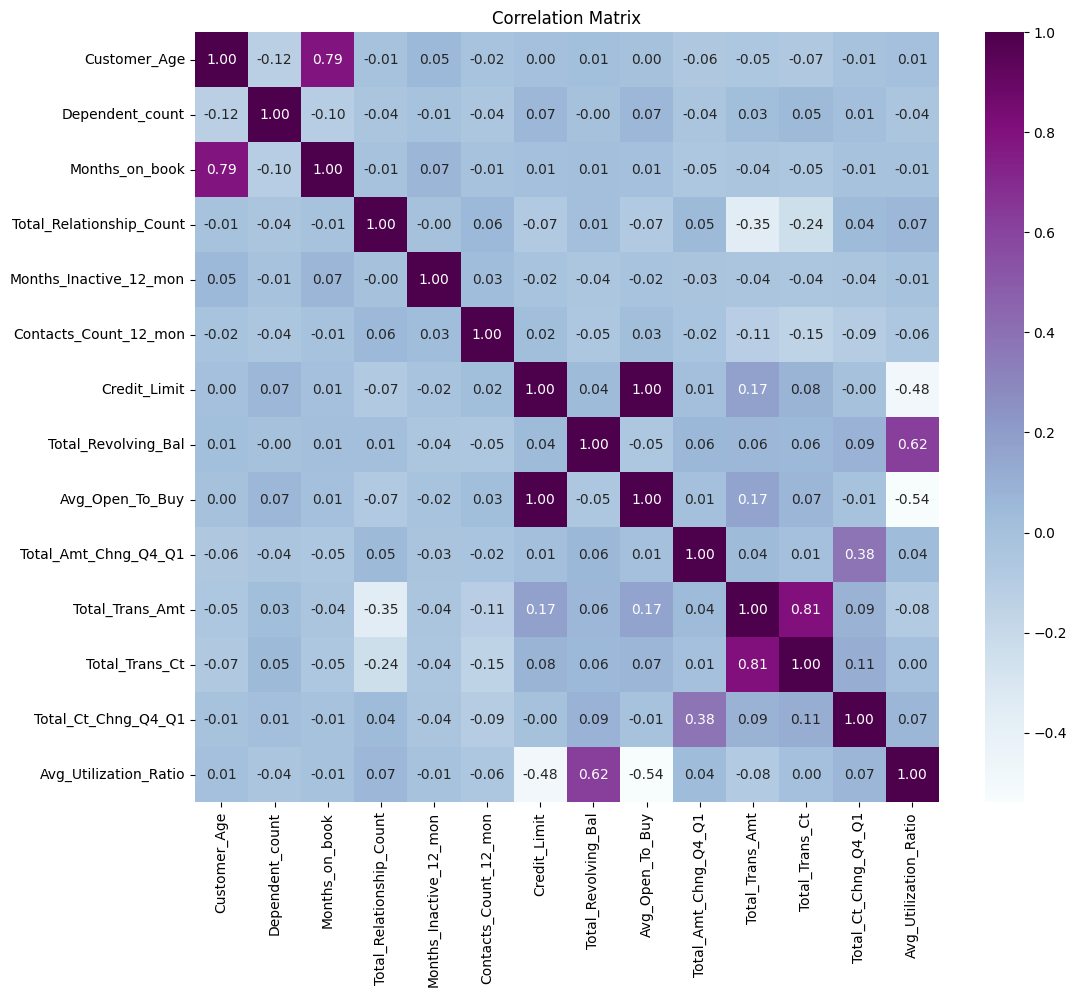

In [11]:
# Correlation matrix

plt.figure(figsize=(12,10))
corr = num_cols.corr()
sns.heatmap(corr, annot=True, fmt='.2f',cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

---

## **Insights**

### 1. **Overall Churn (Attrition_Flag)**

* **Insight**: Most customers are **loyal and stay with the bank**.
* **Why it matters**: Even though churn is relatively low, understanding why some customers leave can help reduce future losses.

### 2. **Gender vs Churn**

* **Insight**: There's a **slight difference in churn rates** between men and women.
* **Why it matters**: Knowing which gender is more likely to leave can help tailor marketing and support strategies.


### 3. **Marital Status vs Churn**

* **Insight**: **Single or divorced individuals** might be slightly more likely to churn than married ones.
* **Why it matters**: Marital status may reflect different financial needs or risk profiles.

### 4. **Education Level vs Churn**

* **Insight**: People with **higher education levels may churn more**.
* **Why it matters**: They might expect better services or have access to alternative financial products.

### 5. **Income Category vs Churn**

* **Insight**: Both **very low and very high-income groups** show higher churn.
* **Why it matters**: Low-income individuals may seek lower fees, and high-income ones may expect more perks or exclusive offers.

### 6. **Card Category vs Churn**

* **Insight**: Customers using certain card types (like **Blue or Platinum**) tend to leave more.
* **Why it matters**: These card types might not meet customer expectations or lack valuable features.

### 7. **Numerical Feature Insights (via Box Plots)**

* **Credit Limit**: Leavers often have **lower credit limits**, possibly due to dissatisfaction or tighter lending criteria.
* **Total Transactions**: Churned customers usually have **fewer transactions**, indicating **lower engagement**.
* **Revolving Balance**: Higher balances may be a sign of **financial stress**, which can drive churn.
* **Months on Book**: Customers who leave have often been with the bank for **less time**, meaning **newer customers are at greater risk**.
* **Contacts Count**: Those who leave may have contacted the bank more often, suggesting **unresolved issues or poor service**.

### 8. **Correlation Matrix (Feature Relationships)**

* **Insight**: Features like **Total Transaction Count and Amount** are strongly related.
* **Why it matters**: Helps simplify the model by choosing only the most important, non-redundant features.



---

### Handling Data Imbalance

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [13]:
print(df['Attrition_Flag'].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [ ]:
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])

In [15]:
x = df.drop('Attrition_Flag',axis=1)
y = df['Attrition_Flag']

In [16]:
x = pd.get_dummies(x,drop_first=True)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [18]:
print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({1: 6799, 0: 1302})


In [19]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({1: 6799, 0: 6799})


In [20]:
scaler = StandardScaler()
x_train_smote_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test) 

## Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(x_train_smote_scaled,y_train_smote)

y_pred_logreg = logreg.predict(x_test_scaled)

print("Logistic Regression Results:")   
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       325
           1       0.94      0.93      0.93      1701

    accuracy                           0.89      2026
   macro avg       0.79      0.80      0.80      2026
weighted avg       0.89      0.89      0.89      2026

Confusion Matrix:
[[ 221  104]
 [ 122 1579]]


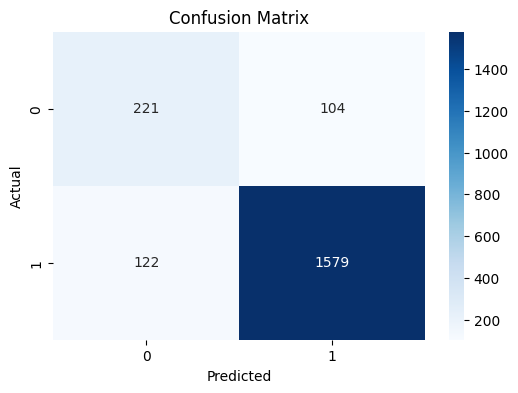

In [22]:
cm_logrig = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_logrig, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Naive Bayes Model

In [23]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_train_smote_scaled,y_train_smote)

y_pred_nb = naive_bayes.predict(x_test_scaled)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       325
           1       0.92      0.90      0.91      1701

    accuracy                           0.85      2026
   macro avg       0.73      0.74      0.73      2026
weighted avg       0.86      0.85      0.85      2026

Confusion Matrix:
[[ 187  138]
 [ 164 1537]]


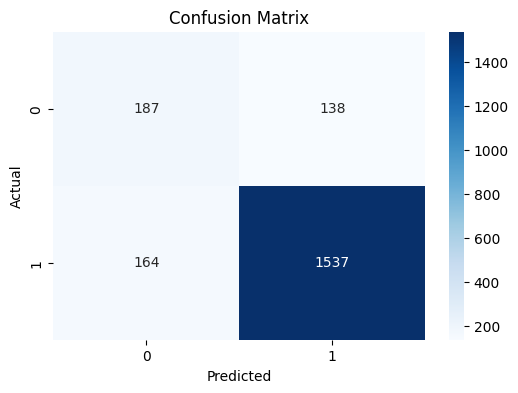

In [24]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## K-Nearest Neighbors Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_smote_scaled,y_train_smote)

y_pred_knn = knn.predict(x_test_scaled)

print("Classification report : ")
print(classification_report(y_test,y_pred_knn))
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred_knn))

Classification report : 
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       325
           1       0.91      0.93      0.92      1701

    accuracy                           0.86      2026
   macro avg       0.74      0.72      0.73      2026
weighted avg       0.85      0.86      0.86      2026

Confusion Matrix : 
[[ 165  160]
 [ 121 1580]]


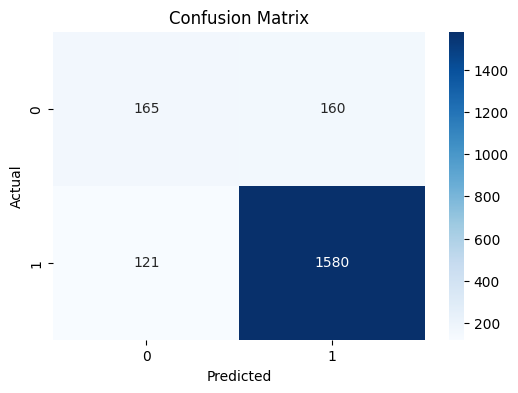

In [26]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SVM Model with GridSearchCV

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'gamma' : [1,0.1,0.01,0.001],
    'kernel' : ['rbf','linear','poly']
}

grid_svm = GridSearchCV(estimator=SVC(),
                        param_grid= param_grid_svm,
                        cv = 5)

grid_svm.fit(x_train_smote_scaled,y_train_smote)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']})

In [28]:
print("Best SVM Perameters : ",grid_svm.best_params_)
y_pred_svm = grid_svm.predict(x_test_scaled)

print()

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Best SVM Perameters :  {'gamma': 0.1, 'kernel': 'rbf'}

SVM Results:
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       325
           1       0.93      0.96      0.95      1701

    accuracy                           0.91      2026
   macro avg       0.85      0.80      0.82      2026
weighted avg       0.91      0.91      0.91      2026

Confusion Matrix:
[[ 209  116]
 [  67 1634]]


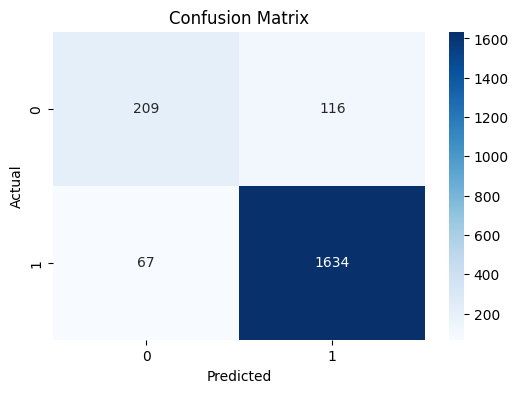

In [29]:
cm_knn = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree with GridSearchCV

In [30]:
from sklearn.tree import DecisionTreeClassifier

param_grid_df = {
    'max_depth' : [3,5,7,10,None],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy']
}

grid_dt = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = param_grid_df,
    cv = 5
)
    
grid_dt.fit(x_train_smote_scaled,y_train_smote)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4]})

In [31]:
print("Best SVM Perameters : ",grid_dt.best_params_)
y_pred_dt = grid_dt.predict(x_test_scaled)

print()

print("Decision Tree Results : ")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred_dt))

Best SVM Perameters :  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

Decision Tree Results : 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       325
           1       0.97      0.95      0.96      1701

    accuracy                           0.93      2026
   macro avg       0.87      0.90      0.88      2026
weighted avg       0.94      0.93      0.93      2026

Confusion Matrix : 
[[ 276   49]
 [  87 1614]]


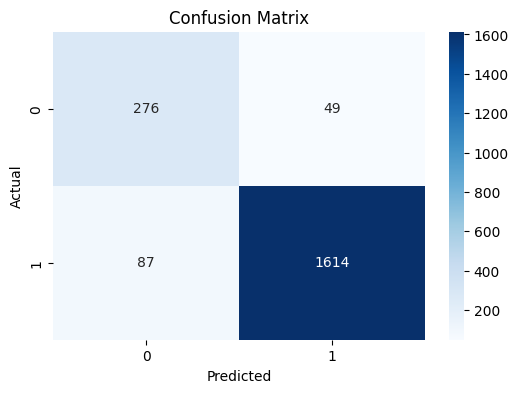

In [32]:
cm_knn = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest with RandomizedSearchCV

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_grid_rf,
    # n_iter = 100,
)

random_rf.fit(x_train_smote_scaled,y_train_smote)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20],
                                        'n_estimators': [100, 200, 300]})

In [34]:
print("Best Perameter of Random Forest : ",random_rf.best_params_)

y_pred_rf = random_rf.predict(x_test_scaled)

print()

print("Decision Tree Results : ")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred_rf))

Best Perameter of Random Forest :  {'n_estimators': 200, 'max_depth': None, 'bootstrap': False}

Decision Tree Results : 
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       325
           1       0.97      0.98      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.93      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Confusion Matrix : 
[[ 276   49]
 [  34 1667]]


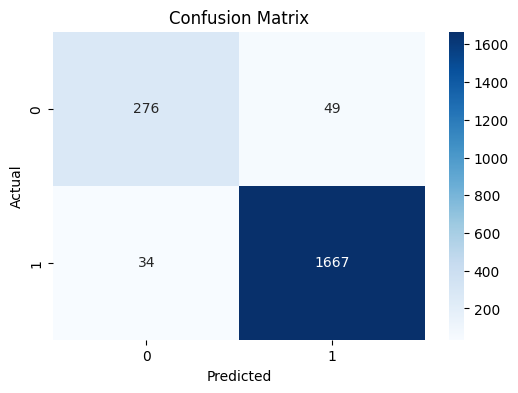

In [35]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model Comparison and Selection

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
5           Random Forest  0.959033   0.971445  0.980012  0.975710
4           Decision Tree  0.932873   0.970535  0.948854  0.959572
3  Support Vector Machine  0.909674   0.933714  0.960611  0.946972
0     Logistic Regression  0.888450   0.938206  0.928277  0.933215
2     K-Nearest Neighbors  0.861303   0.908046  0.928865  0.918338
1             Naive Bayes  0.850938   0.917612  0.903586  0.910545


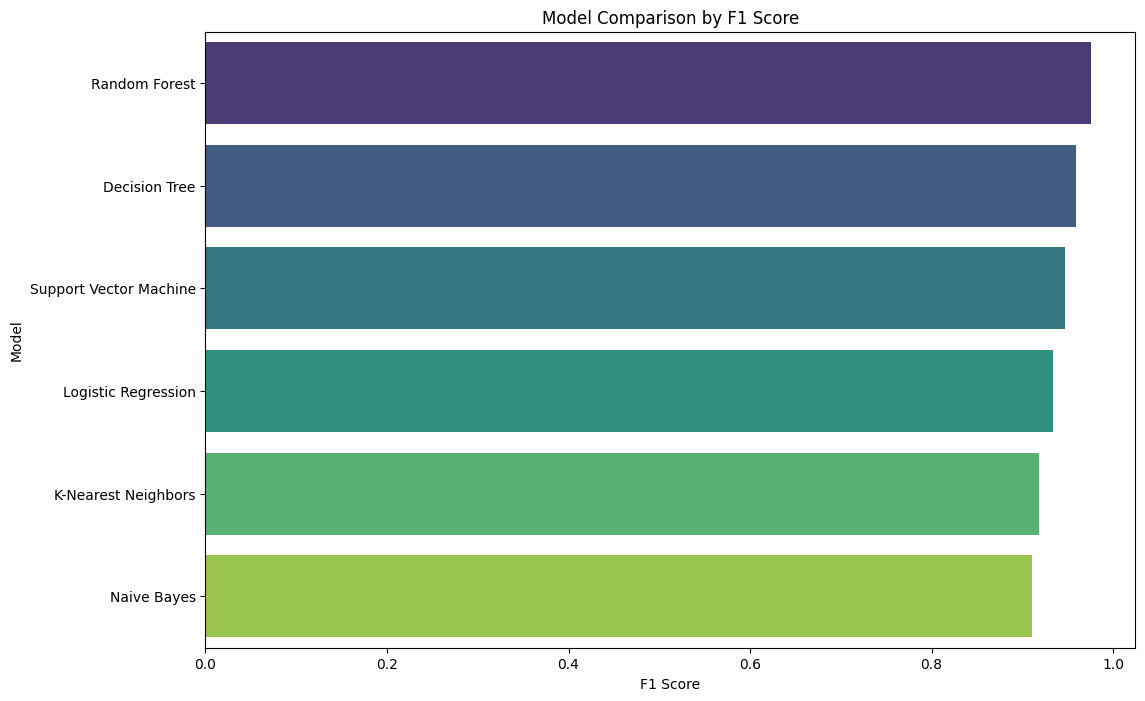

In [36]:
models = {
    'Logistic Regression' : logreg,
    'Naive Bayes' : naive_bayes,
    'K-Nearest Neighbors' : knn,
    'Support Vector Machine' : grid_svm.best_estimator_,
    'Decision Tree' : grid_dt.best_estimator_,
    'Random Forest' : random_rf.best_estimator_
}

result = []

for name, model in models.items():
    y_pred = model.predict(x_test_scaled) 
    accuracy = accuracy_score(y_test, y_pred)
    precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    
    result.append({
        'Model' : name,
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1 Score' : f1
    })

results_df = pd.DataFrame(result)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("Model Comparison:")
print(results_df)

plt.figure(figsize=(12,8))
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='viridis',hue = 'Model')
plt.title('Model Comparison by F1 Score')
plt.show()


As per analysis So the best model is **'Random Forest'**.